# Bicycle trajectory forecasting in Bologna

## 4 - Decision Tree classifier

Lastly we try a simple architecture, to see how it performs with respect to more complicated Neural devices.

Having already framed the problem as a classification, for example, we can approach it with a decision tree.

In [20]:
import pandas as pd
import numpy as np

data            = pd.read_csv("../../preproc/may_jump_encoded_bike.csv", header = None).to_numpy()
indep_test_data = pd.read_csv("../../preproc/june_jump_encoded_bike.csv", header = None).to_numpy()

read = 5

X = np.concatenate([data[:,11-read:11], data[:,-1-read:-1]], axis = 1)
Y = data[:,-1:]

X_it = np.concatenate([indep_test_data[:,11-read:11], indep_test_data[:,-1-read:-1]], axis = 1)
Y_it = indep_test_data[:,-1:]

We perform the usual dataset splitting for the model training, and for this first part we fix the maximal depth to 30 branching layers. 

In [21]:
from sklearn import tree

seed_value = 1789

np.random.seed(seed_value)

from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, train_size=.70)

dt = tree.DecisionTreeClassifier(max_depth=30)
dt.fit(X_train,Y_train)
dt.get_depth()

30

In [22]:
pred_val = dt.predict(X_val)

test_val = Y_val.flatten()

Looking at the accuracy on the validation set we observe a value of $\approx 72 \%$, which is actually slightly higher than what we obtained with the DNNs.

In [24]:
def get_accuracy(tst, prd):
    if len(tst.shape) == 2:
        test = tst.flatten()
    elif len(tst.shape) == 1:
        test = tst
    if len(prd.shape) == 2:
        pred = prd.flatten()
    elif len(prd.shape) == 1:
        pred = prd
    return np.sum(pred == test) / test.size

get_accuracy(test_val, pred_val)

0.7229259415721574

As done previously, we now shift our attention to an independent test set (June trajectories).

In [25]:
pred_it = dt.predict(X_it)

test_it = Y_it.flatten()

get_accuracy(test_it, pred_it)

0.7145130273925357

And obtain a slightly inferior accuracy, but still better than the one obtained with the DNNs.

To measure the impact of the number of tree levels on the accuracy, we run a test, varying the `max_depth` parameter and looking at the accuracy on the independent test set.

In [28]:
from tqdm import tqdm
depths = np.arange(5, 50, 5)
actual_depths = np.empty(shape = depths.shape)
acc = np.empty(shape = depths.shape)

for i, d in tqdm(enumerate(depths)):
    dt = tree.DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train,Y_train)
    pred_it = dt.predict(X_it)
    acc[i] = get_accuracy(Y_it, pred_it)
    actual_depths[i] = dt.get_depth()

9it [00:07,  1.18it/s]


Text(0, 0.5, 'Actual depth')

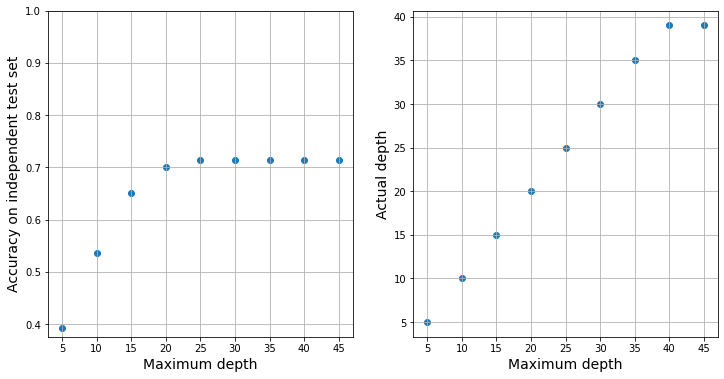

In [29]:
from matplotlib import pyplot as plt

f, a = plt.subplots(ncols = 2, figsize = (12,6))

a[0].scatter(depths, acc)
a[0].grid(True)
a[0].set_ylim( top = 1)
a[0].set_xlabel("Maximum depth", fontsize = 14)
a[0].set_ylabel("Accuracy on independent test set", fontsize = 14)

a[1].scatter(depths, actual_depths)
a[1].grid(True)
a[1].set_xlabel("Maximum depth", fontsize = 14)
a[1].set_ylabel("Actual depth", fontsize = 14)

Where we see that after a rapidly growing trend, for `max_depth`$\approx 25 $ we enter a plateau, wherein albeit adding more and more levels to the tree, we do not gain much accuracy.

Looking explicitly at the numbers

In [31]:
acc

array([0.39197924, 0.53707033, 0.65084446, 0.70146996, 0.71361423,
       0.71466196, 0.71478215, 0.71465412, 0.71463322])

We can see that the DT overtakes the DNNs at roughly 25-30 levels of depth.